Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [2]:
df=pd.read_csv('OnlineRetail.csv')

Exploring dataset

In [3]:
df.shape

(541909, 8)

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Feature Selection

In [7]:
feat=[df['Quantity'],df['UnitPrice']]

In [8]:
type(feat)

list

In [9]:
dfa=pd.DataFrame(feat)

In [10]:
dfa=dfa.T

In [11]:
dfa

,Quantity,UnitPrice
0,6.0,2.55
1,6.0,3.39
2,8.0,2.75
3,6.0,3.39
4,6.0,3.39
...,...,...
541904,12.0,0.85
541905,6.0,2.10
541906,4.0,4.15
541907,4.0,4.15


In [12]:
total_price=dfa['Quantity']*dfa['UnitPrice']

In [13]:
type(total_price)

pandas.core.series.Series

In [14]:
total_price=total_price.to_numpy()

In [15]:
print(total_price)

[15.3  20.34 22.   ... 16.6  16.6  14.85]


In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [17]:
df=df['CustomerID']

In [18]:
df

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [19]:
df=pd.DataFrame(df)

In [20]:
df.insert(1,'TotalPrice',total_price,True)

In [21]:
df=df.iloc[::10000,:]

In [23]:
df.head(10)

,CustomerID,TotalPrice
0,17850.0,15.30
10000,13174.0,9.90
20000,14932.0,15.90
30000,14606.0,4.95
40000,NaN,14.43
50000,15107.0,15.30
60000,NaN,1.63
70000,13158.0,14.85
80000,NaN,3.29
90000,16979.0,10.20


Checking for NaN values

In [23]:
df.isnull().sum()

CustomerID    9
TotalPrice    0
dtype: int64

In [24]:
df.shape

(55, 2)

Dropping NaN values

In [25]:
df=df.dropna()

In [26]:
df.shape

(46, 2)

Checking and handling outliers

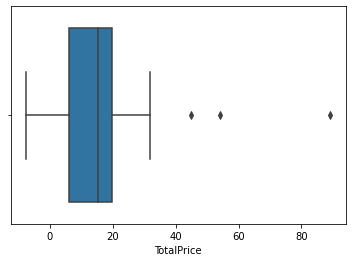

In [27]:
boxplot=sns.boxplot(x=df['TotalPrice'],orient="h",whis=1.5)

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID    2806.2500
TotalPrice      13.6125
dtype: float64


In [29]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
df_iqr.shape

(43, 2)

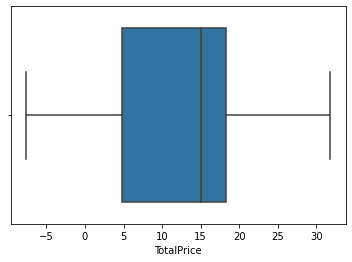

In [31]:
boxplot=sns.boxplot(x=df_iqr['TotalPrice'],orient="h",whis=1.5)

Standardizing the features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [33]:
scaler.fit(df_iqr)
df = scaler.transform(df_iqr)

In [34]:
df=pd.DataFrame(df)

In [35]:
df.head(10)

,0,1
0,1.701265,0.211627
1,-1.123052,-0.397141
2,-0.061215,0.279267
3,-0.258120,-0.955177
4,0.044485,0.211627
5,-1.132716,0.160896
6,1.175178,-0.363320
7,0.709492,1.327700
8,-0.568577,0.499100
9,0.045693,0.403276


Visualizing the data points using a scatter plot

Text(0.5, 1.0, 'Scatter Plot')

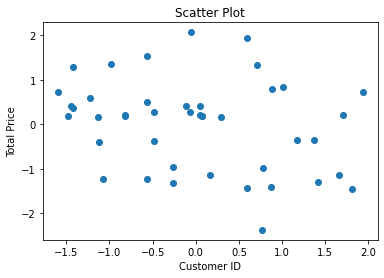

In [36]:
plt.scatter(df[0],df[1])
plt.xlabel('Customer ID')
plt.ylabel('Total Price')
plt.title('Scatter Plot')

Building K-means model with 2 clusters and predicting cluster for each data point

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
Y_pred = km.fit_predict(df)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [38]:
df['cluster'] = Y_pred
df.head()

,0,1,cluster
0,1.701265,0.211627,1
1,-1.123052,-0.397141,0
2,-0.061215,0.279267,0
3,-0.258120,-0.955177,1
4,0.044485,0.211627,0


Finding centroids for each cluster

In [39]:
km.cluster_centers_

array([[-0.47014628,  0.51902989],
       [ 0.87760639, -0.9688558 ]])

In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
print(df1.shape)
print(df2.shape)

(28, 3)
(15, 3)


Visualising 2 clusters with centroids using scatter plot

Text(0, 0.5, 'TotalPrice')

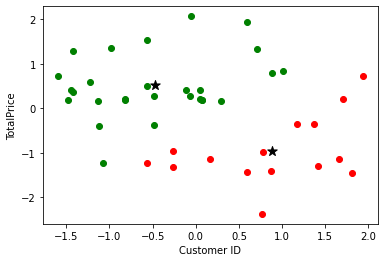

In [41]:
plt.scatter(df1[0],df1[1],color='g')
plt.scatter(df2[0],df2[1],color='r')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Customer ID')
plt.ylabel('TotalPrice')

Using Elbow’s method to choose the optimal value of k

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

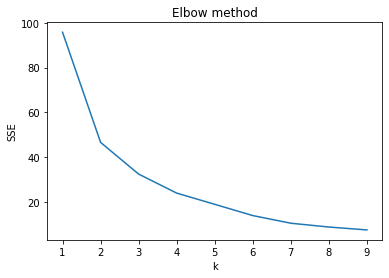

In [42]:
sse=[]
krange = range(1,10)
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(krange,sse)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

Building K-means model with 4 clusters and predicting cluster for each data point

In [43]:
df=df.drop(['cluster'],axis=1)

In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
Y_pred = km.fit_predict(df)
Y_pred

array([0, 2, 1, 2, 1, 3, 0, 1, 3, 1, 1, 2, 1, 0, 3, 3, 3, 3, 1, 0, 2, 3,
       1, 0, 3, 1, 1, 2, 2, 3, 2, 1, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 1])

In [46]:
df['cluster'] = Y_pred
df.head()

,0,1,cluster
0,1.701265,0.211627,0
1,-1.123052,-0.397141,2
2,-0.061215,0.279267,1
3,-0.258120,-0.955177,2
4,0.044485,0.211627,1


Finding centroids for each cluster

In [47]:
km.cluster_centers_

array([[ 1.21522371, -1.0597951 ],
       [ 0.41710863,  0.7297725 ],
       [-0.51344033, -0.95131213],
       [-1.07542823,  0.59769949]])

In [48]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Visualising 4 clusters with centroids using scatter plot

Text(0, 0.5, 'TotalPrice')

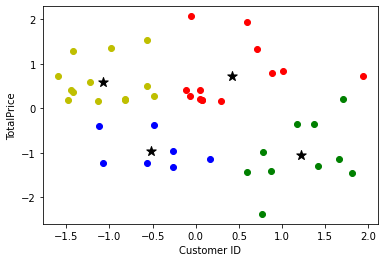

In [49]:
plt.scatter(df1[0],df1[1],color='g')
plt.scatter(df2[0],df2[1],color='r')
plt.scatter(df3[0],df3[1],color='b')
plt.scatter(df4[0],df4[1],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Customer ID')
plt.ylabel('TotalPrice')

Finding Confusion Matrix and Classification Report

In [50]:
df

,0,1,cluster
0,1.701265,0.211627,0
1,-1.123052,-0.397141,2
2,-0.061215,0.279267,1
3,-0.258120,-0.955177,2
4,0.044485,0.211627,1
5,-1.132716,0.160896,3
6,1.175178,-0.363320,0
7,0.709492,1.327700,1
8,-0.568577,0.499100,3
9,0.045693,0.403276,1


In [51]:
km.predict([[20.34,17850]])

array([1])

Finding Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(df['cluster'],km.labels_))

Confusion Matrix
[[10  0  0  0]
 [ 0 13  0  0]
 [ 0  0  7  0]
 [ 0  0  0 13]]


Checking the inertia of the model

In [54]:
km.inertia_

22.955951637677433